In [1]:
import pandas as pd

import geopandas as gpd

import contextily as ctx

import esda
from esda.moran import Moran, Moran_Local

import splot
from splot.esda import moran_scatterplot, plot_moran, lisa_cluster,plot_moran_simulation

import libpysal as lps

import matplotlib.pyplot as plt

import plotly.express as px

/opt/conda/lib/python3.9/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [3]:
Smallplex_Data = gpd.read_file('Data/Smallplex Data New.csv')

In [4]:
Smallplex_Data.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 16002 entries, 0 to 16001
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Permit Type             16002 non-null  object  
 1   Initiating Office       16002 non-null  object  
 2   Issue Datw              16002 non-null  object  
 3   Valuation               16002 non-null  object  
 4   # of Residential Units  16002 non-null  object  
 5   Zone                    16002 non-null  object  
 6   Latitude                16002 non-null  object  
 7   Longitude               16002 non-null  object  
 8   geometry                0 non-null      geometry
dtypes: geometry(1), object(8)
memory usage: 1.1+ MB


In [5]:
Smallplex_Data.sample(5)

Permit Type Initiating Office Issue Datw Valuation  \
7788     Bldg-New          VAN NUYS  1/27/2015  434891.5   
4541     Bldg-New          VAN NUYS  6/27/2013    350000   
9594     Bldg-New          VAN NUYS  3/14/2017    712000   
14279    Bldg-New             METRO  7/29/2014    353500   
12839    Bldg-New          SOUTH LA  6/14/2019    409000   

      # of Residential Units    Zone  Latitude   Longitude geometry  
7788                       1    R1-1  34.04884  -118.51845     None  
4541                       1    R1-1  34.25758  -118.28408     None  
9594                       1    R1-1  34.15509  -118.48406     None  
14279                      2    R2-1  33.96517  -118.27585     None  
12839                      2  R2-1-O  34.02693  -118.29538     None

In [6]:
Smallplex_Data_With_Geometry = gpd.GeoDataFrame(Smallplex_Data,
                                                crs='epsg:4326',
                                                geometry= gpd.points_from_xy(Smallplex_Data.Longitude, Smallplex_Data.Latitude))

In [7]:
Smallplex_Data_With_Geometry.sample(5)

Permit Type Initiating Office  Issue Datw Valuation  \
10531  Bldg-Alter/Repair          VAN NUYS   7/19/2019     21000   
12362           Bldg-New          VAN NUYS  10/30/2019    475000   
13073           Bldg-New             METRO   6/25/2019    471442   
1077            Bldg-New          VAN NUYS   5/29/2019    173000   
784             Bldg-New          VAN NUYS  11/21/2019    480000   

      # of Residential Units      Zone  Latitude   Longitude  \
10531                      1      R3-1  34.22974   -118.6026   
12362                      1  RE11-1-H  34.22052  -118.65797   
13073                      2      C2-1  33.88053   -118.2908   
1077                       1   RD2-1-O   34.0357  -118.34668   
784                        1   [T]RE-1  34.29038  -118.58139   

                          geometry  
10531  POINT (-118.60260 34.22974)  
12362  POINT (-118.65797 34.22052)  
13073  POINT (-118.29080 33.88053)  
1077   POINT (-118.34668 34.03570)  
784    POINT (-118.58139 34.29038)

In [8]:
Smallplex_Data_With_Geometry['Latitude'] = Smallplex_Data_With_Geometry.Latitude.astype(float)
Smallplex_Data_With_Geometry['Longitude'] = Smallplex_Data_With_Geometry.Longitude.astype(float)

In [9]:
Smallplex_Data_With_Geometry.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [11]:
Smallplex_Data['# of Residential Units'].value_counts()

1    12590
2     3067
4      184
3      161
Name: # of Residential Units, dtype: int64

In [12]:
Number_of_Residential_Dwelling_Units = Smallplex_Data['# of Residential Units'].value_counts()
Number_of_Residential_Dwelling_Units

1    12590
2     3067
4      184
3      161
Name: # of Residential Units, dtype: int64

In [13]:
Number_of_Residential_Dwelling_Units = Number_of_Residential_Dwelling_Units.reset_index()
Number_of_Residential_Dwelling_Units

index  # of Residential Units
0     1                   12590
1     2                    3067
2     4                     184
3     3                     161

In [15]:
Number_of_Residential_Dwelling_Units.columns = ['Number of Units', 'count']
Number_of_Residential_Dwelling_Units

Number of Units  count
0               1  12590
1               2   3067
2               4    184
3               3    161

<AxesSubplot:title={'center':'Number of Residential Dwelling Units'}, xlabel='Number of Units'>

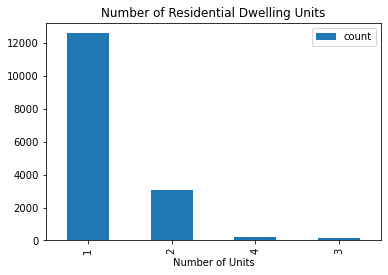

In [16]:
Number_of_Residential_Dwelling_Units.plot.bar(x = 'Number of Units',y = 'count', title = 'Number of Residential Dwelling Units')

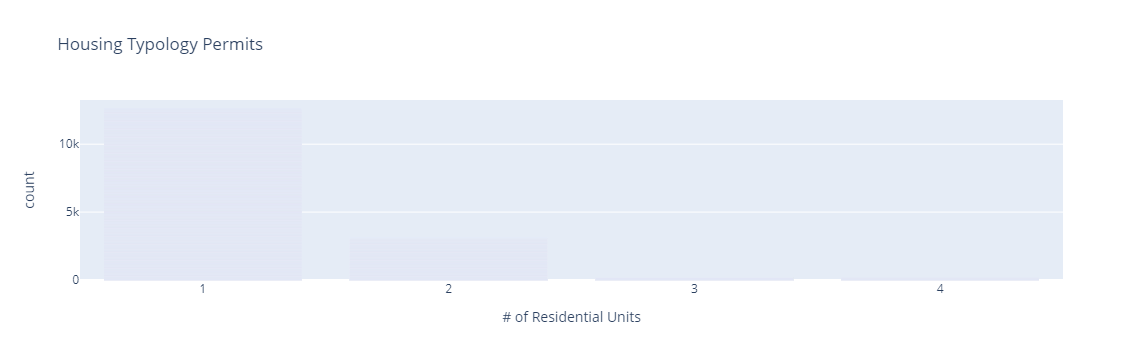

In [24]:
Dwelling_Units_Table = px.bar(Smallplex_Data_With_Geometry,
                              x = '# of Residential Units',
                              title = 'Housing Typology Permits')
                              

Dwelling_Units_Table.show()

In [26]:
Dwelling_Units_Table.write_html("Housing Typology Permits.html")

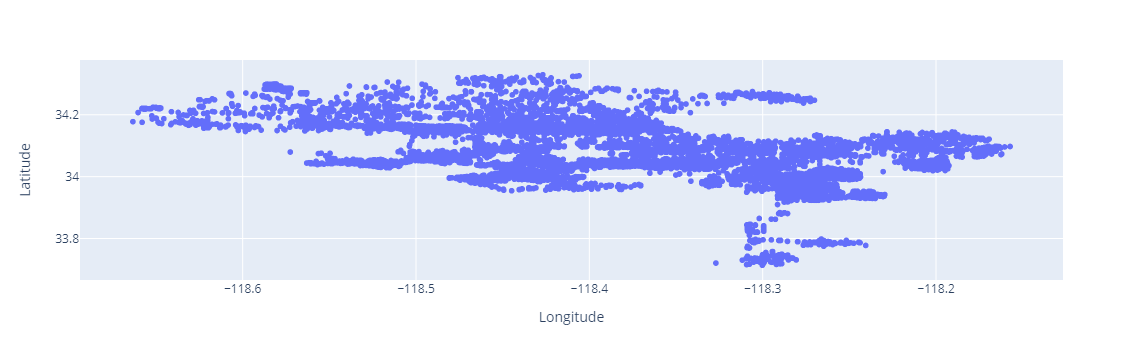

In [27]:
Table = px.scatter(Smallplex_Data_With_Geometry,
           x='Longitude',
           y='Latitude'
)

Table.show()

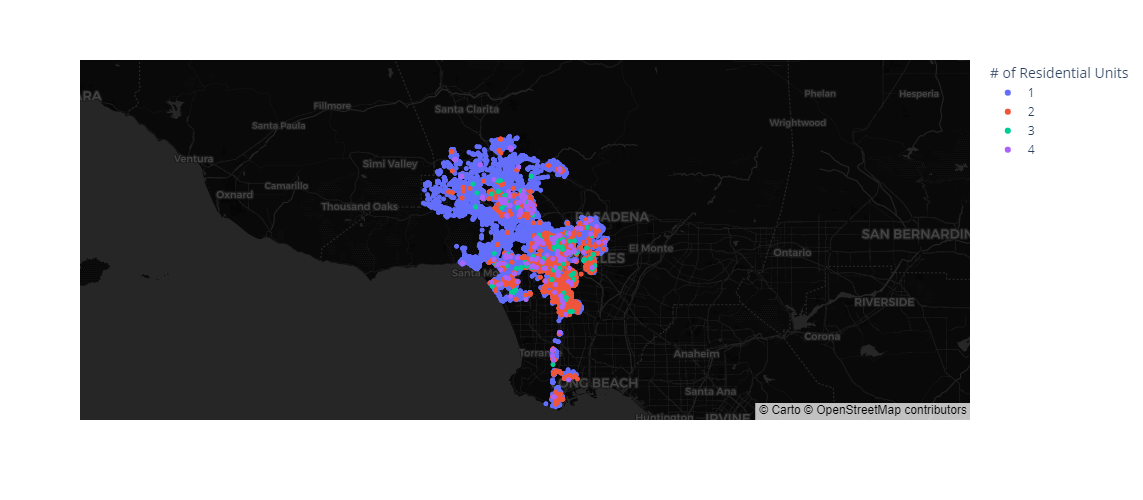

In [33]:
Table = px.scatter_mapbox(Smallplex_Data_With_Geometry,
                        lat='Latitude',
                        lon='Longitude',
                          height=500,
                          color= '# of Residential Units')
                        
Table.update_layout(mapbox_style="carto-darkmatter")
Table.show()

In [35]:
Table.write_html("Housing Typology Map.html")

In [37]:
def smallplex_map(Dwelling = '2'):
    
    Table = px.scatter_mapbox(Smallplex_Data_With_Geometry[Smallplex_Data_With_Geometry['# of Residential Units'] == Dwelling],
                                                      lat='Latitude',
                        lon='Longitude',
                          color= '# of Residential Units')
    Table.update_layout(mapbox_style="carto-darkmatter")

    Table.show()

In [39]:
housing_list = Smallplex_Data_With_Geometry['# of Residential Units'].unique().tolist()
housing_list

['1', '2', '3', '4']

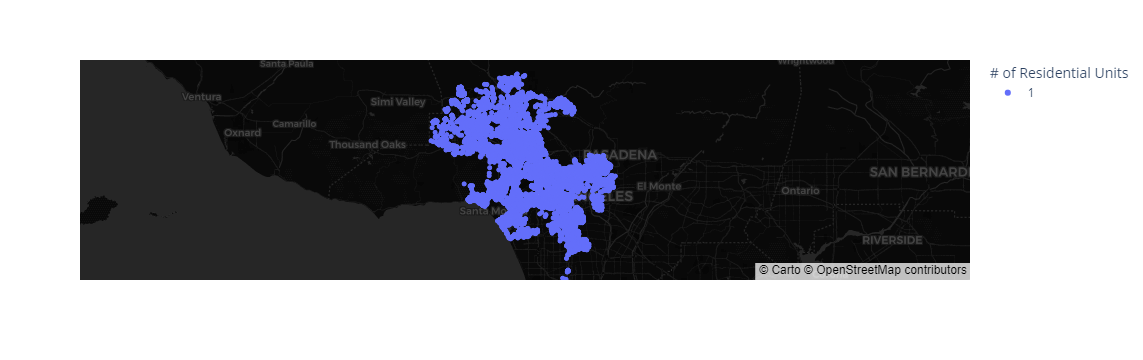

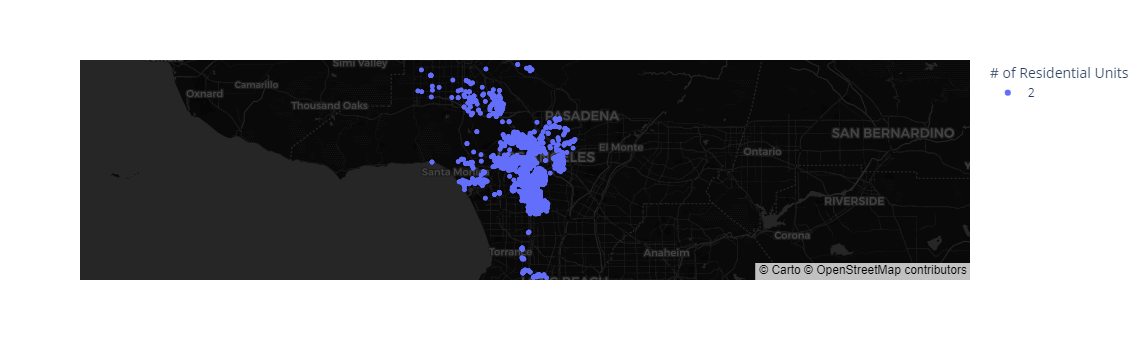

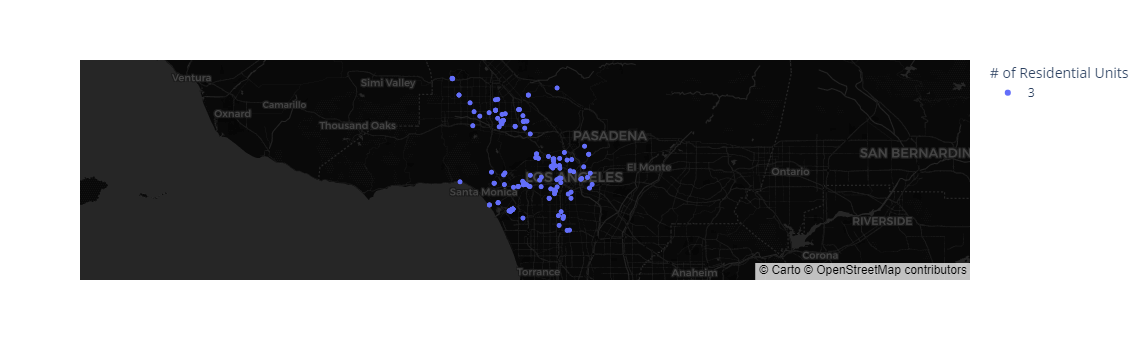

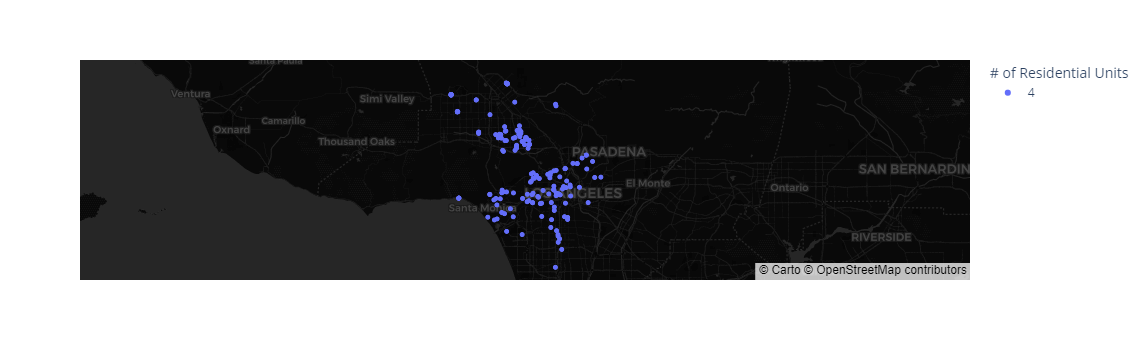

In [48]:
for Dwelling in housing_list:
    smallplex_map(Dwelling)

In [49]:
Smallplex_Data_With_Geometry.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [50]:
Smallplex_Data_With_Geometry = Smallplex_Data_With_Geometry.to_crs(epsg=3857)

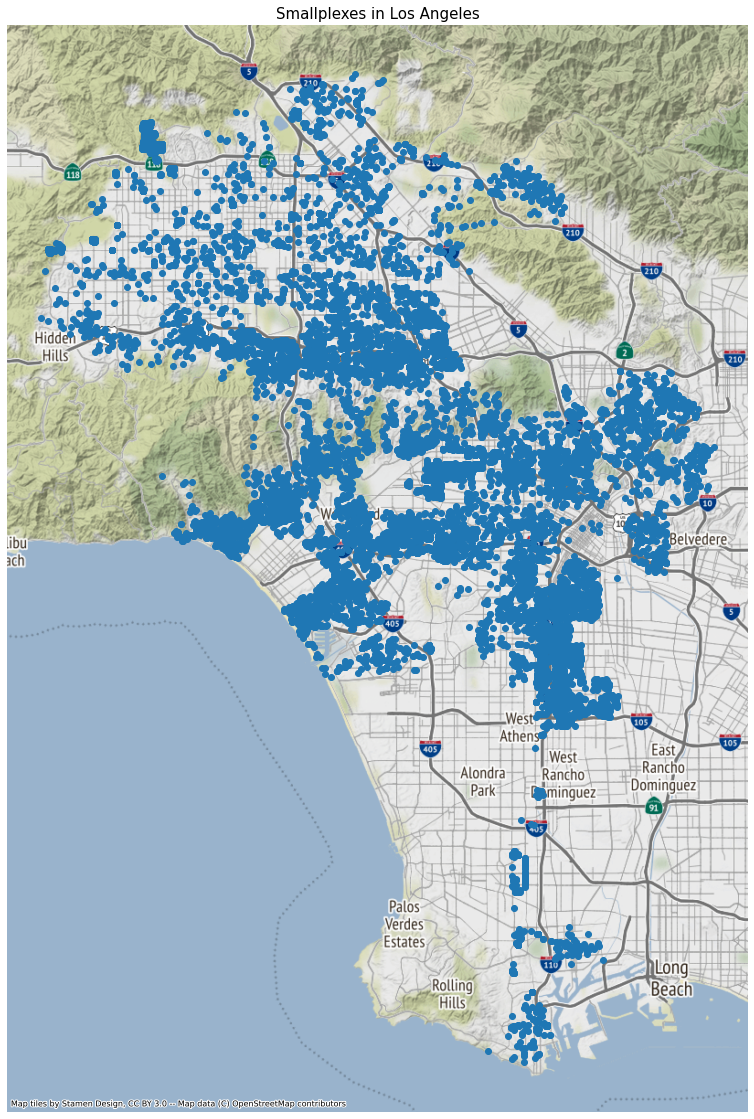

In [51]:
ax = Smallplex_Data_With_Geometry.plot(figsize=(20,20))
ax.set_title('Smallplexes in Los Angeles', fontsize = 15)
ax.axis('off')
ctx.add_basemap(ax)

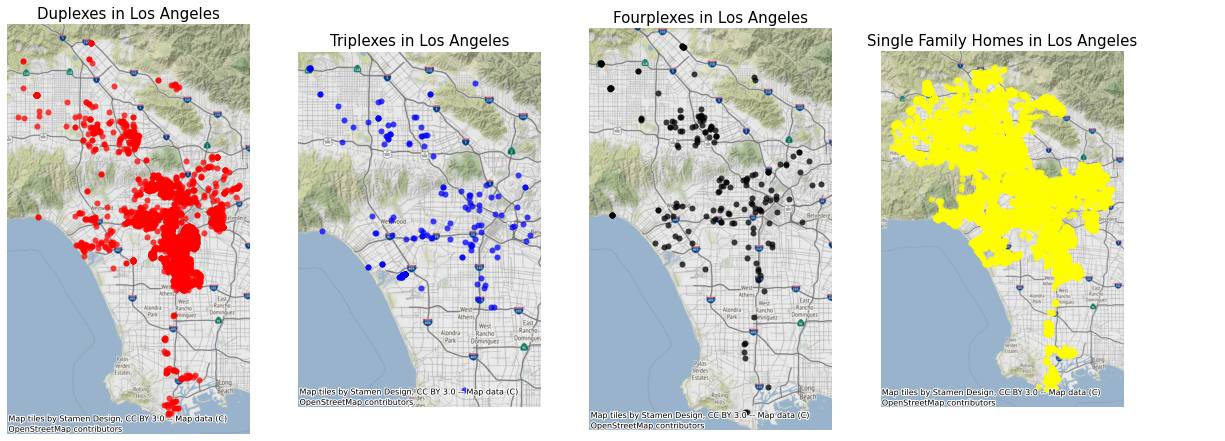

In [63]:
fig, axs = plt.subplots(1, 4, figsize=(20, 20))
ax1, ax2, ax3, ax4= axs

Smallplex_Data_With_Geometry[Smallplex_Data_With_Geometry['# of Residential Units'] == '2'].plot(figsize=(20,20), color = 'r', linewidth = 0, alpha = 0.75, ax = ax1)
ax1.axis("off")
ax1.set_title('Duplexes in Los Angeles', fontsize=15)
ctx.add_basemap(ax1)

Smallplex_Data_With_Geometry[Smallplex_Data_With_Geometry['# of Residential Units'] == '3'].plot(figsize=(20,20), color = 'b', linewidth = 0, alpha = 0.75, ax = ax2)
ax2.axis("off")
ax2.set_title('Triplexes in Los Angeles', fontsize=15)
ctx.add_basemap(ax2)

Smallplex_Data_With_Geometry[Smallplex_Data_With_Geometry['# of Residential Units'] == '4'].plot(figsize=(20,20), color = 'black', linewidth = 0, alpha = 0.75, ax = ax3)
ax3.axis("off")
ax3.set_title('Fourplexes in Los Angeles', fontsize=15)
ctx.add_basemap(ax3)

Smallplex_Data_With_Geometry[Smallplex_Data_With_Geometry['# of Residential Units'] == '1'].plot(figsize=(20,20), color = 'yellow', linewidth = 0, alpha = 0.75, ax = ax4)
ax4.axis("off")
ax4.set_title('Single Family Homes in Los Angeles', fontsize=15)
ctx.add_basemap(ax4)
